# Made custom dataset

In [1]:
!git clone https://github.com/theAIGuysCode/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 444, done.
remote: Total 444 (delta 0), reused 0 (delta 0), pack-reused 444 (from 1)
Receiving objects: 100% (444/444), 34.09 MiB | 24.95 MiB/s, done.
Resolving deltas: 100% (157/157), done.


In [2]:
%cd /content/OIDv4_ToolKit

/content/OIDv4_ToolKit


In [3]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.21.2
    Uninstalling docutils-0.21.2:
      Successfully uninstalled docutils-0.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 8.2.3 requires docutils<0.22,>=0.20, but you have docutils 0.16 which is incompatible.


In [4]:
#!python main.py downloader --classes Butterfly --type_csv train --limit 1800 -y
!python main.py downloader --classes Fish --type_csv train --limit 800 -y #find in OIDv4_Toolkit/images/classes.png


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Fish.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Automatic download.
...145%, 0 MB, 44887 KB/s, 0 seconds passed
[DOWNLOAD] | File class-descriptions-boxable.csv do

In [5]:
#change the label in OID tool kit in the classes txt to desirable tags
#use first 300 (6) for test/validation
import os
import shutil
os.mkdir('/content/OIDv4_ToolKit/OID/Dataset/validation')
os.mkdir('/content/OIDv4_ToolKit/OID/Dataset/validation/Fish')
os.mkdir('/content/OIDv4_ToolKit/OID/Dataset/validation/Fish/Label')

filenames=os.listdir('/content/OIDv4_ToolKit/OID/Dataset/train/Fish')
filenames.remove('Label')

sour='/content/OIDv4_ToolKit/OID/Dataset/train/Fish/'
dest='/content/OIDv4_ToolKit/OID/Dataset/validation/Fish/'

#for i in range(300):
for i in range(6):
  filename=filenames[i]
  shutil.move(sour+filename,dest+filename)
  piste=filename.find('.')
  labelname=filename[:piste]+'.txt'
  shutil.move(sour+'Label/'+labelname,dest+'Label/'+labelname)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

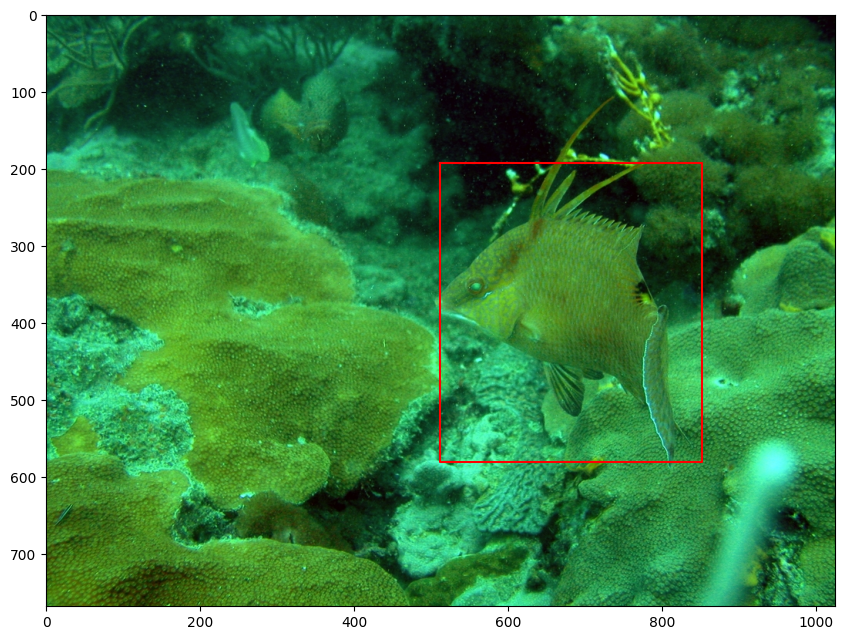

In [7]:
#example image
filenames=os.listdir('/content/OIDv4_ToolKit/OID/Dataset/train/Fish/')
filenames.remove('Label')
filename=filenames[0]
piste=filename.find('.')
labelname=filename[:piste]+'.txt'
filepath='/content/OIDv4_ToolKit/OID/Dataset/train/Fish/'
kuva=plt.imread(filepath+filename)
m,n,_=kuva.shape
labelpath='/content/OIDv4_ToolKit/OID/Dataset/train/Fish/Label/'
label=np.loadtxt(labelpath+labelname,usecols=(1,2,3,4))

if len(label.shape)==1: #if only one box
  label=np.expand_dims(label,axis=0) #1D-array->2D-row vector

M=label.shape[0]

plt.figure(figsize=(n/100,m/100))
plt.imshow(kuva)
for r in range(M):
  xmin,ymin,xmax,ymax=label[r,:]
  plt.plot([xmin,xmax,xmax,xmin,xmin],[ymin,ymin,ymax,ymax,ymin],'r')
plt.show()

In [8]:
!python convert_annotations.py

Currently in subdirectory: validation
Converting annotations for class:  Fish
100% 6/6 [00:00<00:00, 18.07it/s]
Currently in subdirectory: train
Converting annotations for class:  Fish
100% 794/794 [00:28<00:00, 27.96it/s]


In [9]:
#remove Label-folders
shutil.rmtree('/content/OIDv4_ToolKit/OID/Dataset/train/Fish/Label')
shutil.rmtree('/content/OIDv4_ToolKit/OID/Dataset/validation/Fish/Label')

In [10]:
#create folders for training- and validation images
os.mkdir('/content/train')
os.mkdir('/content/train/images')
os.mkdir('/content/train/labels')
os.mkdir('/content/valid')
os.mkdir('/content/valid/images')
os.mkdir('/content/valid/labels')

In [11]:
#move images and labels
dir='/content/OIDv4_ToolKit/OID/Dataset/train/Fish/'
filenames=os.listdir(dir)

for filename in filenames:
  filepath=dir + filename
  if filename.endswith(".txt"):
    shutil.move(filepath,'/content/train/labels/' + filename)
  else:
    shutil.move(filepath,'/content/train/images/' + filename)

dir='/content/OIDv4_ToolKit/OID/Dataset/validation/Fish/'
filenames=os.listdir(dir)

for filename in filenames:
  filepath=dir + filename
  if filename.endswith(".txt"):
    shutil.move(filepath,'/content/valid/labels/' + filename)
  else:
    shutil.move(filepath,'/content/valid/images/' + filename)

In [12]:
#zip and take to Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
os.mkdir('/content/drive/MyDrive/YOLO11')
os.mkdir('/content/drive/MyDrive/YOLO11/train')
os.mkdir('/content/drive/MyDrive/YOLO11/valid')

In [14]:
%cd /content/train/images
!zip -r /content/drive/MyDrive/YOLO11/train/images.zip ./
%cd /content/train/labels
!zip -r /content/drive/MyDrive/YOLO11/train/labels.zip ./

/content/train/images
  adding: 9dc6c8f529631b6e.jpg (deflated 0%)
  adding: 3851a471467c8cbc.jpg (deflated 1%)
  adding: dbfa09294f2e59dd.jpg (deflated 0%)
  adding: 924300b9db5fe695.jpg (deflated 0%)
  adding: 564e0a11f5496795.jpg (deflated 0%)
  adding: f85b6535a3803283.jpg (deflated 0%)
  adding: ff825b3ec928eac9.jpg (deflated 0%)
  adding: 689bb2ab73c9bb03.jpg (deflated 0%)
  adding: 5f345ba3c26fb365.jpg (deflated 0%)
  adding: 6b891e30edc0dc78.jpg (deflated 1%)
  adding: 05537e4012462490.jpg (deflated 0%)
  adding: 5725caf6472131c9.jpg (deflated 1%)
  adding: 30412d14890d9e43.jpg (deflated 0%)
  adding: 015d75b3131bdba5.jpg (deflated 0%)
  adding: 10ad13170242ecae.jpg (deflated 1%)
  adding: dc4846cbe5bfef28.jpg (deflated 0%)
  adding: 6405543b6ed01897.jpg (deflated 0%)
  adding: 036d45c8ae546479.jpg (deflated 0%)
  adding: 0173a57e6e550e51.jpg (deflated 0%)
  adding: 7f0a5e59a6602713.jpg (deflated 1%)
  adding: 64ed3d71c26f5ce1.jpg (deflated 0%)
  adding: 9dcdedb143ea95fb.jpg (d

In [15]:
%cd /content/valid/images
!zip -r /content/drive/MyDrive/YOLO11/valid/images.zip ./
%cd /content/valid/labels
!zip -r /content/drive/MyDrive/YOLO11/valid/labels.zip ./

/content/valid/images
  adding: 889a84d99fa6095e.jpg (deflated 0%)
  adding: faa11761605b7bfd.jpg (deflated 0%)
  adding: 5f6be0a71ec3ef7b.jpg (deflated 0%)
  adding: da2f3106951e080a.jpg (deflated 0%)
  adding: be4753d670cfddad.jpg (deflated 0%)
  adding: 98ca181602d096b6.jpg (deflated 0%)
/content/valid/labels
  adding: faa11761605b7bfd.txt (deflated 54%)
  adding: 98ca181602d096b6.txt (deflated 34%)
  adding: 5f6be0a71ec3ef7b.txt (deflated 38%)
  adding: be4753d670cfddad.txt (deflated 39%)
  adding: da2f3106951e080a.txt (deflated 59%)
  adding: 889a84d99fa6095e.txt (deflated 51%)


# Custom weight

In [16]:
#create folders to Colab and unzip data from Drive
import os
os.makedirs('/content/custom_data')
os.makedirs('/content/custom_data/train')
os.makedirs('/content/custom_data/valid')
os.makedirs('/content/custom_data/train/images')
os.makedirs('/content/custom_data/valid/images')
os.makedirs('/content/custom_data/train/labels')
os.makedirs('/content/custom_data/valid/labels')

In [17]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## train data

In [18]:
!unzip '/content/drive/MyDrive/YOLO11/train/images.zip' -d '/content/custom_data/train/images'

Archive:  /content/drive/MyDrive/YOLO11/train/images.zip
  inflating: /content/custom_data/train/images/9dc6c8f529631b6e.jpg  
  inflating: /content/custom_data/train/images/3851a471467c8cbc.jpg  
  inflating: /content/custom_data/train/images/dbfa09294f2e59dd.jpg  
  inflating: /content/custom_data/train/images/924300b9db5fe695.jpg  
  inflating: /content/custom_data/train/images/564e0a11f5496795.jpg  
  inflating: /content/custom_data/train/images/f85b6535a3803283.jpg  
  inflating: /content/custom_data/train/images/ff825b3ec928eac9.jpg  
  inflating: /content/custom_data/train/images/689bb2ab73c9bb03.jpg  
  inflating: /content/custom_data/train/images/5f345ba3c26fb365.jpg  
  inflating: /content/custom_data/train/images/6b891e30edc0dc78.jpg  
  inflating: /content/custom_data/train/images/05537e4012462490.jpg  
  inflating: /content/custom_data/train/images/5725caf6472131c9.jpg  
  inflating: /content/custom_data/train/images/30412d14890d9e43.jpg  
  inflating: /content/custom_data

In [19]:
!unzip '/content/drive/MyDrive/YOLO11/train/labels.zip' -d '/content/custom_data/train/labels'

Archive:  /content/drive/MyDrive/YOLO11/train/labels.zip
  inflating: /content/custom_data/train/labels/0bff8473c5c104b6.txt  
  inflating: /content/custom_data/train/labels/a7ad5efa9f430804.txt  
  inflating: /content/custom_data/train/labels/c19ea6a2723d7409.txt  
  inflating: /content/custom_data/train/labels/07328360ec203a1f.txt  
  inflating: /content/custom_data/train/labels/8e0106830078e92d.txt  
  inflating: /content/custom_data/train/labels/66fb00bf4b66c084.txt  
  inflating: /content/custom_data/train/labels/62409c8d7a14d417.txt  
  inflating: /content/custom_data/train/labels/50b689967627a063.txt  
  inflating: /content/custom_data/train/labels/127f3d7d08e54b55.txt  
  inflating: /content/custom_data/train/labels/5725caf6472131c9.txt  
  inflating: /content/custom_data/train/labels/6a4787ac9e707acc.txt  
  inflating: /content/custom_data/train/labels/2ed6930f2d17002b.txt  
  inflating: /content/custom_data/train/labels/e5a9b690ee56b283.txt  
  inflating: /content/custom_data

## validation set

In [20]:
!unzip '/content/drive/MyDrive/YOLO11/valid/images.zip' -d '/content/custom_data/valid/images'

Archive:  /content/drive/MyDrive/YOLO11/valid/images.zip
  inflating: /content/custom_data/valid/images/889a84d99fa6095e.jpg  
  inflating: /content/custom_data/valid/images/faa11761605b7bfd.jpg  
  inflating: /content/custom_data/valid/images/5f6be0a71ec3ef7b.jpg  
  inflating: /content/custom_data/valid/images/da2f3106951e080a.jpg  
  inflating: /content/custom_data/valid/images/be4753d670cfddad.jpg  
  inflating: /content/custom_data/valid/images/98ca181602d096b6.jpg  


In [21]:
!unzip '/content/drive/MyDrive/YOLO11/valid/labels.zip' -d '/content/custom_data/valid/labels'

Archive:  /content/drive/MyDrive/YOLO11/valid/labels.zip
  inflating: /content/custom_data/valid/labels/faa11761605b7bfd.txt  
  inflating: /content/custom_data/valid/labels/98ca181602d096b6.txt  
  inflating: /content/custom_data/valid/labels/5f6be0a71ec3ef7b.txt  
  inflating: /content/custom_data/valid/labels/be4753d670cfddad.txt  
  inflating: /content/custom_data/valid/labels/da2f3106951e080a.txt  
  inflating: /content/custom_data/valid/labels/889a84d99fa6095e.txt  


## Start modeling

In [22]:
%cd '/content'

/content


In [23]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [24]:
from ultralytics import YOLO
model=YOLO('yolo11n.pt') #use pretrained weights as initializations

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 105MB/s]


In [25]:
#train using custom data
model.train(data='/content/custom_data.yaml',epochs=30,imgsz=640,cache=True)

#if you want to continue more epochs:
#model=YOLO('/content/runs/detect/train/weights/last.pt')
#model.train(data='/content/custom_data.yaml',epochs=30,imgsz=640,cache=True)

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/custom_data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

100%|██████████| 755k/755k [00:00<00:00, 24.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/custom_data/train/labels... 794 images, 0 backgrounds, 0 corrupt: 100%|██████████| 794/794 [00:02<00:00, 364.51it/s]

train: New cache created: /content/custom_data/train/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.7GB RAM): 100%|██████████| 794/794 [00:06<00:00, 118.10it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/custom_data/valid/labels... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:00<00:00, 149.90it/s]

val: New cache created: /content/custom_data/valid/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.0GB RAM): 100%|██████████| 6/6 [00:00<00:00, 31.13it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.68G      1.527      2.348      1.433        117        640: 100%|██████████| 50/50 [00:15<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

                   all          6         21      0.633     0.0952       0.23      0.091



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.06G      1.628      1.856      1.496         87        640: 100%|██████████| 50/50 [00:13<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.30it/s]

                   all          6         21      0.291      0.333      0.255      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      3.08G      1.682       1.83      1.532         62        640: 100%|██████████| 50/50 [00:14<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.63it/s]

                   all          6         21      0.129      0.275      0.124     0.0321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      3.09G      1.623      1.721      1.499        142        640: 100%|██████████| 50/50 [00:13<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.36it/s]

                   all          6         21      0.227      0.286      0.148     0.0484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      3.11G      1.648      1.652      1.493         71        640: 100%|██████████| 50/50 [00:13<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.73it/s]

                   all          6         21     0.0721      0.143     0.0756     0.0228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      3.12G      1.583      1.552       1.43        138        640: 100%|██████████| 50/50 [00:13<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.96it/s]

                   all          6         21      0.766       0.19       0.24      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      3.14G      1.516      1.467      1.426         83        640: 100%|██████████| 50/50 [00:12<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.37it/s]

                   all          6         21      0.218      0.238      0.179     0.0634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      3.15G        1.5      1.425      1.414         87        640: 100%|██████████| 50/50 [00:13<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.31it/s]

                   all          6         21      0.558      0.286      0.261      0.098



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      3.17G      1.459      1.361      1.382         62        640: 100%|██████████| 50/50 [00:12<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]

                   all          6         21      0.679      0.286      0.368      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      3.18G      1.446      1.316      1.385        124        640: 100%|██████████| 50/50 [00:12<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.80it/s]

                   all          6         21      0.408      0.238      0.214      0.081



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30       3.2G      1.395      1.264      1.325        154        640: 100%|██████████| 50/50 [00:13<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.06it/s]

                   all          6         21      0.347      0.476      0.297      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      3.21G      1.362      1.205      1.316         98        640: 100%|██████████| 50/50 [00:13<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.60it/s]

                   all          6         21      0.355      0.446       0.41      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      3.47G      1.325      1.172      1.304         79        640: 100%|██████████| 50/50 [00:12<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.21it/s]

                   all          6         21      0.507      0.333        0.3      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      3.48G      1.325      1.147      1.282        132        640: 100%|██████████| 50/50 [00:13<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]

                   all          6         21      0.598      0.571      0.517      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      3.78G       1.29      1.112      1.267         93        640: 100%|██████████| 50/50 [00:12<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]

                   all          6         21      0.414      0.238      0.306      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      3.79G      1.256      1.056       1.25         63        640: 100%|██████████| 50/50 [00:12<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]

                   all          6         21      0.463      0.452      0.392      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      3.81G      1.246      1.025      1.236         77        640: 100%|██████████| 50/50 [00:12<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]

                   all          6         21      0.509      0.347      0.371      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      3.82G      1.215      1.006       1.22        123        640: 100%|██████████| 50/50 [00:12<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all          6         21      0.552      0.381      0.462      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      3.84G      1.221     0.9794      1.227        104        640: 100%|██████████| 50/50 [00:12<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.35it/s]

                   all          6         21      0.342      0.333      0.257      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      3.85G      1.162     0.9278      1.181         84        640: 100%|██████████| 50/50 [00:13<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.93it/s]

                   all          6         21      0.412      0.333      0.321      0.141


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      3.87G      1.612      1.618      1.528        141        640: 100%|██████████| 50/50 [00:14<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.65it/s]

                   all          6         21      0.861      0.296      0.432      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.88G      1.518       1.48       1.47         46        640: 100%|██████████| 50/50 [00:12<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]

                   all          6         21      0.484      0.381      0.363      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30       3.9G      1.462      1.402      1.407         47        640: 100%|██████████| 50/50 [00:12<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.22it/s]

                   all          6         21      0.709      0.524      0.535      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.91G      1.452      1.328      1.396         91        640: 100%|██████████| 50/50 [00:12<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.55it/s]

                   all          6         21      0.514      0.524       0.48      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.93G      1.436      1.277      1.392         48        640: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.95it/s]

                   all          6         21      0.777      0.381      0.445      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.94G      1.393      1.276      1.374         15        640: 100%|██████████| 50/50 [00:12<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.57it/s]

                   all          6         21      0.974      0.333      0.484      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.96G       1.38        1.2      1.353         38        640: 100%|██████████| 50/50 [00:12<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.48it/s]

                   all          6         21      0.766      0.381      0.452      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.97G      1.362      1.167      1.332         28        640: 100%|██████████| 50/50 [00:12<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.61it/s]

                   all          6         21      0.687      0.571       0.59      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.99G      1.365      1.137      1.319         46        640: 100%|██████████| 50/50 [00:12<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.42it/s]

                   all          6         21      0.661      0.524      0.561      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         4G      1.317      1.092      1.286         30        640: 100%|██████████| 50/50 [00:12<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.28it/s]

                   all          6         21      0.624      0.524      0.508      0.201



30 epochs completed in 0.114 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.19it/s]


                   all          6         21      0.708      0.524      0.534      0.228
Speed: 0.3ms preprocess, 3.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c6c8b6635d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [26]:
#copy best weigts to Drive
import shutil
sour='/content/runs/detect/train/weights/best.pt'
dest='/content/drive/MyDrive/YOLO11/Fish.pt'
shutil.copy(sour,dest)

'/content/drive/MyDrive/YOLO11/Fish.pt'

In [27]:
#load best weights
#!pip install ultralytics
#from ultralytics import YOLO
model=YOLO('/content/drive/MyDrive/YOLO11/Fish.pt')

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
#predictions for test image (this doesn't need GPU)
predictions=model.predict('/content/Fish.jpg',save=True) #,conf=0.5) -> shows only predictions with confidence>0.5
laatikot=predictions[0].boxes.data.cpu().numpy() #t .cpu(), if GPU is in use
print(laatikot) #[xmin,ymin,xmax,ymax,confidence,luokka]



image 1/1 /content/Fish.jpg: 448x640 24 Fishs, 47.2ms
Speed: 2.5ms preprocess, 47.2ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
[[     165.28      228.75      240.55      308.81     0.86598           0]
 [     108.36      162.94      177.57      226.03     0.67708           0]
 [     335.68      92.542      408.19      150.63     0.65264           0]
 [      314.3      240.65      381.28      287.67     0.64583           0]
 [     12.422      101.72      149.96      180.45     0.64473           0]
 [     425.92      142.25      470.67      182.12     0.63078           0]
 [     377.95      263.29      443.59       312.5       0.629           0]
 [        372      204.78      455.95      253.86     0.61525           0]
 [     212.48      116.25      286.49      173.21     0.61144           0]
 [     2.3381      280.89      59.148      312.65     0.60566           0]
 [    0.04226      179.13      50.884      223.03     0.60546

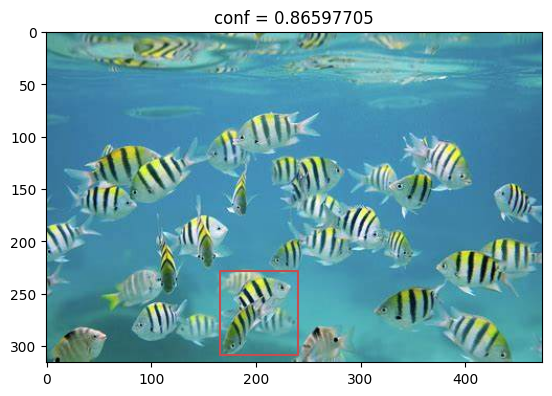

In [30]:
kuva=plt.imread('/content/Fish.jpg')
xmin,ymin,xmax,ymax,conf,cls=laatikot[0,:]
plt.imshow(kuva)
plt.plot([xmin,xmax,xmax,xmin,xmin],[ymax,ymax,ymin,ymin,ymax],'r')
plt.title('conf = '+str(conf))
plt.show()

In [31]:
#prediction for test image
dir = '/content/custom_data/valid/'
kuvanimet=os.listdir(dir+'images')
N=len(kuvanimet)
k=np.random.randint(N)
kuvanimi=kuvanimet[k]
predictions=model.predict(dir+'images/'+kuvanimi,save=True) #,conf=0.5) -> shows only predictions with confidence >0.5
laatikot=predictions[0].boxes.data.cpu().numpy() # .cpu(), if you use GPU
print(laatikot) #[xmin,ymin,xmax,ymax,confidence,luokka]



image 1/1 /content/custom_data/valid/images/be4753d670cfddad.jpg: 448x640 1 Fish, 10.1ms
Speed: 3.3ms preprocess, 10.1ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
[[     75.497      51.716      978.43      586.75     0.83494           0]]


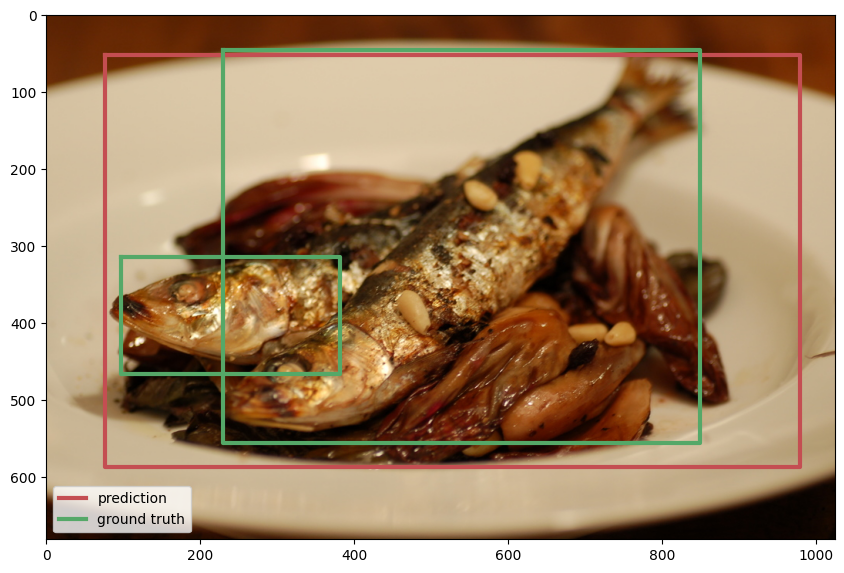

In [32]:
#predicted and ground truth boxes
mp=laatikot.shape[0] #number of predicted boxes
ind=kuvanimi.find('.')
labelnimi=kuvanimi[:ind]+'.txt'
labels=np.loadtxt(dir+'/labels/'+labelnimi)
#if only one ground truth box, reshape labels 1D-array -> 2D-array (row vector)
if len(labels.shape)==1:
  labels=np.expand_dims(labels,axis=0)

ml=labels.shape[0] #number of ground truth boxes

kuva=plt.imread(dir+'images/'+kuvanimi)
m,n=kuva.shape[:2]

plt.figure(figsize=(n/100,m/100))
plt.imshow(kuva)

#predicted boxes
for r in range(mp):
  Xmin,Ymin,Xmax,Ymax,Conf,Luokka=laatikot[r,:] #Conf(idence) = probability that box contains an object of class Luokka
  if r==0:
    plt.plot([Xmin,Xmin,Xmax,Xmax,Xmin],[Ymin,Ymax,Ymax,Ymin,Ymin],'r',lw=3,label='prediction')
  else:
    plt.plot([Xmin,Xmin,Xmax,Xmax,Xmin],[Ymin,Ymax,Ymax,Ymin,Ymin],'r',lw=3)


#ground truth boxes
for r in range(ml):
  luokka,xc,yc,w,h=labels[r,:]
  xc*=n
  yc*=m
  w*=n
  h*=m
  xmin=xc-w/2
  ymin=yc-h/2
  xmax=xc+w/2
  ymax=yc+h/2
  if r==0:
    plt.plot([xmin,xmin,xmax,xmax,xmin],[ymin,ymax,ymax,ymin,ymin],'g',lw=3,label='ground truth')
  else:
    plt.plot([xmin,xmin,xmax,xmax,xmin],[ymin,ymax,ymax,ymin,ymin],'g',lw=3)
plt.legend()
plt.show()


IoU = 0.6411881679416127


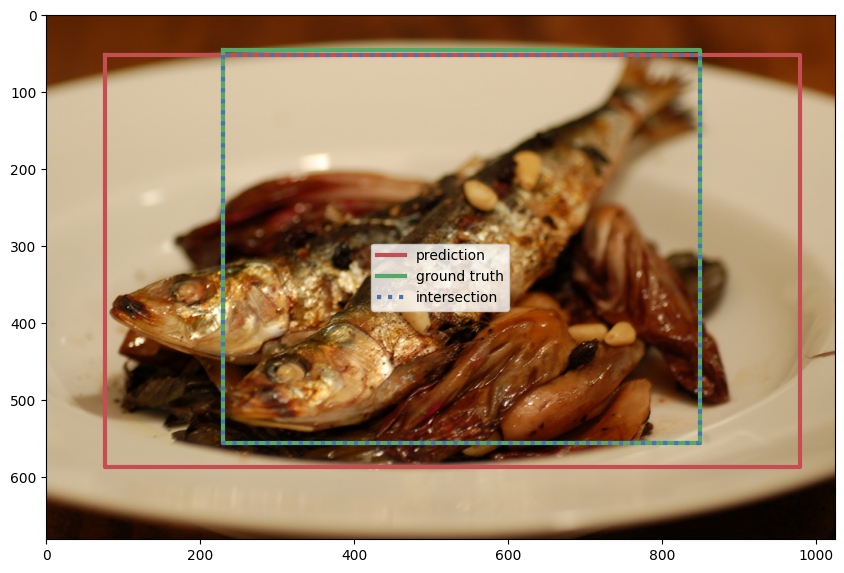

In [33]:
#if only one predicted and ground truth box
#calculate IoU
#corners of intersection
Ixmin=max([Xmin,xmin])
Iymin=max([Ymin,ymin])
Ixmax=min([Xmax,xmax])
Iymax=min([Ymax,ymax])
#area of intersection
A_of_I=(Ixmax-Ixmin)*(Iymax-Iymin)
#area of union
A_of_U=(Xmax-Xmin)*(Ymax-Ymin)+(xmax-xmin)*(ymax-ymin)-A_of_I

IoU=A_of_I/A_of_U
print('IoU = '+str(IoU))
plt.figure(figsize=(n/100,m/100))
plt.imshow(kuva)
plt.plot([Xmin,Xmin,Xmax,Xmax,Xmin],[Ymin,Ymax,Ymax,Ymin,Ymin],'r',lw=3,label='prediction')
plt.plot([xmin,xmin,xmax,xmax,xmin],[ymin,ymax,ymax,ymin,ymin],'g',lw=3,label='ground truth')
plt.plot([Ixmin,Ixmin,Ixmax,Ixmax,Ixmin],[Iymin,Iymax,Iymax,Iymin,Iymin],'b:',lw=3,label='intersection')
plt.legend()
plt.show()